**Название проекта**:
- telecom.  

**Заказчик:**
- провайдер виртуальный телефонии.  

**Цель проекта:**
- определить неэффективных операторов.  

**Основные этапы проекта:**

- предварительная обработка данных;
- определение неэффективных операторов;
- проверка статистических гипотез.

**Итоги проекта:**
- определение неэффективных операторов.

**Исполнитель, контакты:**


***

***для работы с Tableau Public преобразуем дату в формат "год-месяц-день"  
и сохраним новый датасет telecom_dataset_2 локально  
dataset['data'] = pd.to_datetime(dataset['date']).dt.date  
dataset.to_csv('C:\\Users\\Влада\\Desktop\\Учёба\\Яндекс\\выпускной проект\\telecom_dataset_2.csv')***

***

## Изучение данных из файла

### Импорт необходимых библиотек

In [1]:
%autosave 120
import pandas as pd # импорт библиотеки pandas
from scipy import stats as st # импорт библиотеки scipy
import scipy.stats as stats
import numpy as np # импорт библиотеки numpy
import matplotlib.pyplot as plt # импорт библиотеки matplotlib
%matplotlib inline
import seaborn as sns # импорт библиотеки seaborn
import warnings # отключим предупреждения о безопасности
warnings.filterwarnings('ignore')
from IPython.core.display import display, HTML 
display(HTML("<style>.container{width:90% !important;}</style>")) # масштабирование экрана
import seaborn as sns
!pip install plotly
pd.set_option('display.max.columns', None) # покажем все столбцы (убедимся что нет скрытых)
import plotly.express as px
from datetime import datetime
import datetime as dt
from pandas.plotting import register_matplotlib_converters
# конвертеры, которые позволяют использовать типы pandas в matplotlib  
register_matplotlib_converters()

import math as mth

Autosaving every 120 seconds


In [2]:
# from datetime import datetime
# pd.options.display.float_format = '{:,.2f}'.format

### Чтение файлов и описание данных

In [3]:
try:
    clients = pd.read_csv('C:\\Users\\Влада\\Desktop\\Учёба\\Яндекс\\выпускной проект\\telecom_clients.csv')
# чтение и сохранение файла локально
except:
    
# чтение и сохранение файла из сети


In [4]:
try:
    dataset = pd.read_csv('C:\\Users\\Влада\\Desktop\\Учёба\\Яндекс\\выпускной проект\\telecom_dataset.csv')
# чтение и сохранение файла локально
except:
    
# чтение и сохранение файла из сети

***Примечание: Прочитать датасет ......zip можно не распаковывая, используя команду pd.read_csv('.zip')***

In [5]:
# display(clients.head(2)) # получим две первые строки датафрейма 
# # display(clients.sample(2)) # получим две случайные строки датафрейма 
# display(clients.tail(2)) # получим две последние строки датафрейма

***Описание данных:***
- user_id — идентификатор клиентского аккаунта в сервисе;
- tariff_plan — текущий тарифный план клиента;
- date_start — дата регистрации клиентв в сервисе.

In [6]:
# display(dataset.head(2)) # получим две первые строки датафрейма 
# # display(dataset.sample(2)) # получим две случайные строки датафрейма 
# display(dataset.tail(2)) # получим две последние строки датафрейма

***Описание данных:***
- user_id — идентификатор клиентского аккаунта в сервисе;
- date — дата статистики;
- direction — направление вызовов (out - исходящий вызов, in — входящий вызов);
- internal — является ли звонок внутренним звонком между операторами клиента;
- operator_id — идентификатор оператора;
- is_missed_call — является ли звонок пропущенным;
- calls_count — количество звонков;
- call_duration — длительность звонка (без учета времени ожидания);
- total_call_duration — длительность звонка (с учетом времени ожидания).

### Исследовательский анализ данных

In [7]:
# print('', 'Общая информации о наборе данных clients:', '', sep = '\n')
# clients.info()

In [8]:
# print('', 'Информация основных статистических данных таблицы clients:',  sep = '\n')
# clients.describe().round(1)

In [9]:
# print('', 'Общая информации о наборе данных dataset:', '', sep = '\n')
# dataset.info()

In [10]:
# print('', 'Информация основных статистических данных таблицы dataset:',  sep = '\n')
# dataset.describe().round(1)

***Вывод:***
- просмотр данных по таблице clients показал отсутствие пропусков;
- просмотр данных по таблице dataset показал:  
-- необходимость изменения типа данных по столбцу operator_id;
-- наличие пропусков по столбцам  internal и operator_id;
-- столбцы calls_count, call_duration, total_call_duration имеют ассиметричные наборы данных с дополнительными значениями справа, то есть имеют скошенность в положительную сторону, потому что медиана (50%) меньше среднего (mean).

### Предварительная обработка данных

### Работа с датой

In [11]:
clients['data'] = pd.to_datetime(clients['date_start']).dt.date
clients[['date_start', 'data']].dtypes

date_start    object
data          object
dtype: object

In [12]:
print('Дата начала периода в таблице clients:', clients['data'].min(),\
      'Дата окончания периода:', clients['data'].max(),\
      'Данные представлены за период:',  clients['data'].max()-clients['data'].min(), sep='\n')

Дата начала периода в таблице clients:
2019-08-01
Дата окончания периода:
2019-10-31
Данные представлены за период:
91 days, 0:00:00


In [13]:
dataset['data'] = pd.to_datetime(dataset['date']).dt.date
dataset[['date', 'data']].dtypes

date    object
data    object
dtype: object

In [14]:
print('Дата начала периода в таблице dataset:', dataset['data'].min(),\
      'Дата окончания периода:', dataset['data'].max(),\
      'Данные представлены за период:',  dataset['data'].max()-dataset['data'].min(), sep='\n')

Дата начала периода в таблице dataset:
2019-08-02
Дата окончания периода:
2019-11-28
Данные представлены за период:
118 days, 0:00:00


### Работа с пропусками в данных

In [15]:
# определим количество пропусков по таблице clients
# выполним сортировку количества пропусков по возрастанию значений в столбцах
print('', 'Количество пропусков, строк:', '',
      clients.isna().sum().sort_values(), sep = '\n')


Количество пропусков, строк:

user_id        0
tariff_plan    0
date_start     0
data           0
dtype: int64


***Данные по таблице clients не содержат пропусков.***

In [16]:
# определим количество пропусков по таблице dataset
print('', 'Количество пропусков, строк:', '',
      dataset.isna().sum().sort_values(), sep = '\n')


Количество пропусков, строк:

user_id                   0
date                      0
direction                 0
is_missed_call            0
calls_count               0
call_duration             0
total_call_duration       0
data                      0
internal                117
operator_id            8172
dtype: int64


In [17]:
# определим процент пропусков по таблице dataset
(dataset.isna().sum().sort_values()*100/dataset.shape[0]).round(1).reset_index().rename(columns = {'index' : 'column_name', 0 : '%'})
#, inplace = True) 
#выполним сортировку количества пропусков по возрастанию значений в столбцах в процентах
#количество строк в столбце df.shape[0], столбцов df.shape[1]

,column_name,%
0,user_id,0.0
1,date,0.0
2,direction,0.0
3,is_missed_call,0.0
4,calls_count,0.0
5,call_duration,0.0
6,total_call_duration,0.0
7,data,0.0
8,internal,0.2
9,operator_id,15.2


***Оцениваем, что количеством пропусков по столбцу `internal` можно принебречь, так как оно незначительно.  
Столбец `operator_id`  имеет значительный процент пропусков, поэтому необходимо продолжить работу с пропусками в данных.  
Заполним пропуски по столбцу значением '1', так как на этой стадии анализа значение operator_id не принципиально и не оказывает существенного влиния на работу.***

In [18]:
# чтобы отбросить всё, что не имеет значения по столбцу 'internal' - пропуски (~указывающий NOT)
dataset = dataset[~dataset['internal'].isna()]

In [19]:
dataset['operator_id'] = dataset['operator_id'].fillna(1)
dataset['operator_id'] = dataset['operator_id'].astype('int64') # преобразуем столбец к формату целых чисел
dataset['operator_id'].dtypes # получим тип данных

dtype('int64')

### Обработка дубликатов

In [20]:
# получим количество явных дубликатов методом duplicated()
print('Найдено явных дубликатов в таблице clients:', clients.duplicated().sum())

# ссылка
# https://andreyex.ru/programmirovanie/python/kak-udalit-povtoryayushhiesya-stroki-v-pandas-python/

# получим повторяющиеся строки
# dup_rows = logs[logs.duplicated()]
# dup_rows

Найдено явных дубликатов в таблице clients: 0


In [21]:
print('Найдено явных дубликатов в таблице dataset:', dataset.duplicated().sum())

Найдено явных дубликатов в таблице dataset: 4893


In [22]:
# удалим явные дубликаты
dataset = dataset.drop_duplicates(keep=False)

In [23]:
print('Найдено явных дубликатов в таблице dataset:', dataset.duplicated().sum())
print('Количество строк в таблице logs после удаления дубликатов составляет:', len(dataset))

Найдено явных дубликатов в таблице dataset: 0
Количество строк в таблице logs после удаления дубликатов составляет: 43999


***Сделаем проверку таблицы dataset на дубликаты строк с разными `operator_id`, то есть проверим, не повторяются ли значения всех других столбцов, кроме значения `operator_id`.***

In [24]:
df = dataset.drop_duplicates(subset=['user_id', 'date', 'direction', 'internal', 'is_missed_call', 'calls_count',
                                          'call_duration', 'total_call_duration'])
print('Количество строк в таблице dataset составляет:', len(df))

Количество строк в таблице dataset составляет: 43910


***Выявляем дубликаты по столбцу operator_id.***

In [25]:
# получим список operator_id с уникальными значениями
list_df = df['operator_id'].tolist()
# print(list_df)

In [26]:
# получим таблицу дубликатов
e = dataset.query('operator_id not in @list_df')
# e.info()
e

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,data
17497,166939,2019-11-20 00:00:00+03:00,out,True,955068,True,2,0,0,2019-11-20
49072,168187,2019-11-20 00:00:00+03:00,out,False,937770,True,1,0,37,2019-11-20
49886,168225,2019-11-28 00:00:00+03:00,out,False,970258,True,1,0,11,2019-11-28


In [27]:
dataset = dataset.query('operator_id in @list_df') # перезапишем dataset без дубликатов
# dataset.info()

In [28]:
# print(dataset.columns.tolist())

***Вывод:***  
- предварительная обработка выявила пропуски и дубликаты в данных, с которыми проведена работа.

### Дополнительные расчеты 

In [29]:
# рассчитаем среднюю длительностью одного звонка (с учетом времени ожидания) по количеству звонков
dataset['total_duration_1'] = (dataset['total_call_duration'] / dataset['calls_count']).round()
# рассчитаем среднюю длительностью одного звонка (без учета времени ожидания)
dataset['call_duration_1'] = dataset['call_duration'] / dataset['calls_count']
# рассчитаем среднюю длительность ожидания как отношение разницы между
# длительностью звонка (с учетом времени ожидания) и длительностью звонка (без учета времени ожидания) 
# к количеству звонков
dataset['wait_duration'] = ((dataset['total_call_duration'] - dataset['call_duration']) / dataset['calls_count']).round()
dataset[['total_duration_1', 'call_duration_1', 'wait_duration']] = dataset[['total_duration_1', 'call_duration_1', 'wait_duration']].\
                                                                    astype('int64') # преобразуем к целым числам
dataset.head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,data,total_duration_1,call_duration_1,wait_duration
0,166377,2019-08-04 00:00:00+03:00,in,False,1,True,2,0,4,2019-08-04,2,0,2
1,166377,2019-08-05 00:00:00+03:00,out,True,880022,True,3,0,5,2019-08-05,2,0,2
2,166377,2019-08-05 00:00:00+03:00,out,True,880020,True,1,0,1,2019-08-05,1,0,1


***Описание данных:***
- total_duration_1 — средняя длительность одного звонка (с учетом времени ожидания);
- call_duration_1 — средняя длительность одного звонка (без учета времени ожидания);
- wait_duration — средняя длительность времени ожидания.

In [30]:
# очистим данные от операторов, которые не общались с клиентами (время разговора = 0),
# или время ожидания равно общей продолжительности разговора
df = dataset.query('call_duration_1 > 0')
# df.info()
print('Количество операторов, дозвонившихся до абонентов, составляет: ', df.shape[0], '.')
print('Общее количество операторов составляет: ', dataset.shape[0], '.')

Количество операторов, дозвонившихся до абонентов, составляет:  24949 .
Общее количество операторов составляет:  43996 .


***Так как значительная часть операторов не дозванивалась до абонентов, оставим данные по ним в таблице.***

In [31]:
# сохраним измененные данные в новую переменную df, 
# dataset оставляем в качестве резерного варианта на случай необходимости восстановления
df = dataset.copy()

**Построим графики распределения для переменных**

***Таблица clients***

In [32]:
plan_group = clients.groupby(['tariff_plan']).agg(count=('user_id', 'count')).reset_index()
# plan_group.head()

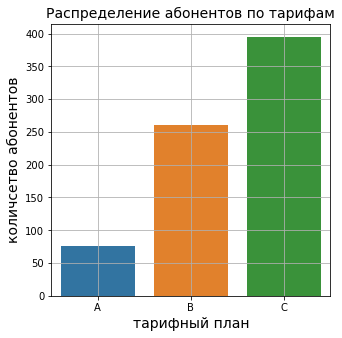

In [33]:
plt.figure(figsize=(5, 5))
sns.barplot(x=plan_group['tariff_plan'], y=plan_group['count'])
plt.xlabel('тарифный план', fontsize = 14)
plt.ylabel('количсетво абонентов', fontsize = 14)
plt.title('Распределение абонентов по тарифам', fontsize = 14)
plt.grid(True)
plt.show()

***Вывод:***
- тарифный план А наименее востребован, и им пользуются около 70 клиентов;
- тарифный план В востребован у 250 клиентов;
- тарифный план С наиболее востребован, им пользуется примерно 400 клиентов.

***Таблица dataset***

***Построим графики динамики количества звонков в зависимости от направления вызова direction (исходящий out/входящий in)  
и типа internal (внутренний True/внешний False).***

In [34]:
df['internal'] = df['internal'].map({True: 'internal-True', False: 'internal-False'})
# df.head(3)

In [35]:
direction_group = df.pivot_table(index=['data'], columns = 'direction',  values = 'calls_count', aggfunc = 'sum').reset_index()
# direction_group.head(3)

In [36]:
internal_group = df.pivot_table(index=['data'], columns = 'internal',  values = 'calls_count', aggfunc = 'sum').reset_index()
# internal_group.head(3)

In [37]:
# объеденим таблицы
di_group = direction_group.merge(internal_group, how='inner')
di_group.head(3)

,data,in,out,internal-False,internal-True
0,2019-08-02,2.0,19.0,18.0,3.0
1,2019-08-03,2.0,26.0,27.0,1.0
2,2019-08-04,2.0,4.0,4.0,2.0


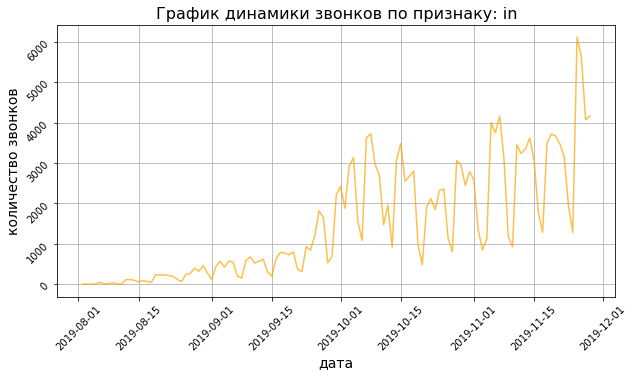

<Figure size 432x288 with 0 Axes>

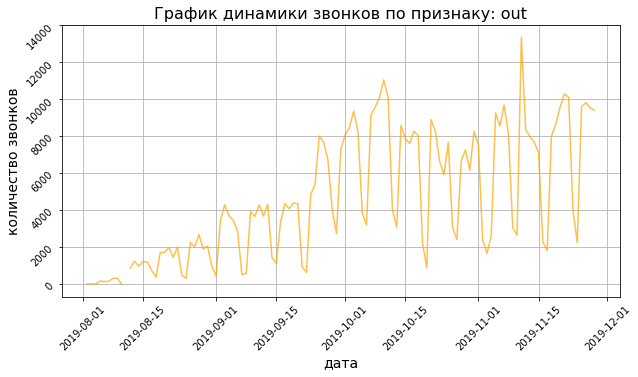

<Figure size 432x288 with 0 Axes>

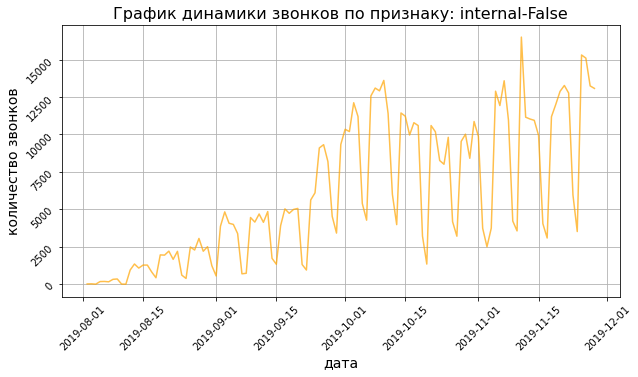

<Figure size 432x288 with 0 Axes>

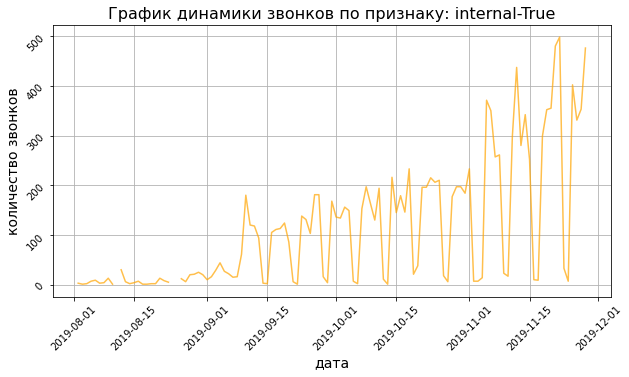

<Figure size 432x288 with 0 Axes>

In [38]:
for column in ['in','out', 'internal-False', 'internal-True']:
    plt.figure(figsize = (10, 5))
    plt.plot(di_group['data'].tolist(), di_group[column].tolist(), 
    alpha = .7, color = 'orange', linestyle = 'solid')
    plt.xlabel('дата', fontsize = 14, color = 'black', fontstyle = 'normal')
    plt.ylabel('количество звонков', fontsize = 14, color = 'black', fontstyle = 'normal')
    # размер, стиль, цвет, толщина шрифта
    plt.title('График динамики звонков по признаку: '+column, fontsize = 16, color = 'black', loc = 'center')
    # название, размер, цвет, выравнивание заголовка
    plt.xticks(rotation = 45) # развернем значение осей чтоб не было наложения
    plt.yticks(rotation = 45)
    plt.grid(True)
    # линии разметки
    plt.show()
    plt.tight_layout()

***Вывод:***
- вид графиков показывает периодические спады, которые происходят по всем признакам в одни и те же дни (2019-08-04, 2019-08-11, 2019-08-18 и тд), то есть имеют выраженную недельную цикличность со спадом в воскресенье. Возможно является выходным днем в колл-центре, или снижено количество операторов на линии (проверим это предположение).  
День недели смотрел по календарю, как еще это сделать не знаю, как проверить гипотезу тоже не сообразил. Например если сформулировать нулевую как количество операторов на линиях одинаково каждый день, потом группируем по дням недели и потом затык. Построил графиком ниже.

***Вариант с помощью цикла и distplot вполне подходящий, но для дискретных переменных лучше использовать столбцовые графики с накоплением, а гистограммы лучше подойдут для непрерывных переменных***

<Figure size 864x360 with 0 Axes>

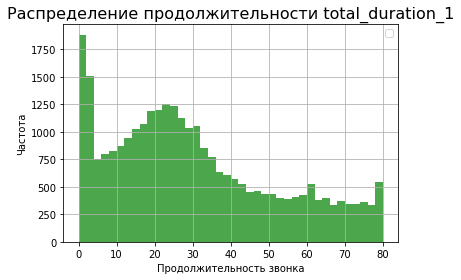

<Figure size 864x360 with 0 Axes>

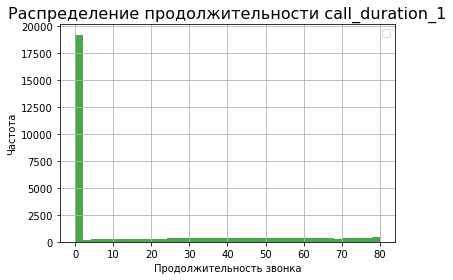

<Figure size 864x360 with 0 Axes>

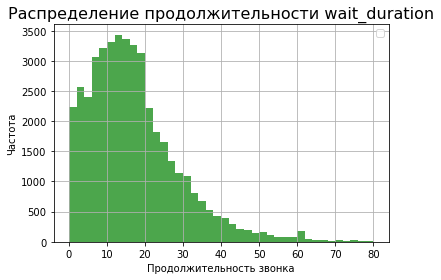

In [39]:
for column in ['total_duration_1', 'call_duration_1', 'wait_duration']:
    plt.figure(figsize=(12, 5))
    df.plot(kind = 'hist', y = column, bins=40, range=(0, 80), alpha=.7, color='green')
    plt.title(column)
    plt.grid(True)
    plt.legend('')
    plt.xlabel('Продолжительность звонка')
    plt.ylabel('Частота')
    plt.title('Распределение продолжительности '+column, size=16)
    plt.show()

***Выводы:***
- график распределения продолжительности разговора с учетом времени ожидания показывает, что большинство звонков имеют продолжительность 0 минут (разговор не состоялся) или находятся в интервале от 20 до 30 минут;
- график распределения продолжительности разговора без учета времени ожидания показывает, что большинство звонков имеют продолжительность 0 минут (разговор не состоялся), количество остальных звонков равномерно распределено по продолжительности;
- график распределения продолжительности времени ожидания показывает, что операторов ожидают ответа от 10 до 20 минут.

In [40]:
df['total_duration_1'].value_counts().reset_index().head(5).sort_values(by='total_duration_1', ascending=False).\
                        rename(columns = {'index' : 'total_duration_1', 'total_duration_1' : 'count'})

,total_duration_1,count
0,0,1275
1,2,1167
2,22,686
3,24,686
4,18,656


In [41]:
df['call_duration_1'].value_counts().reset_index().head(5).sort_values(by='call_duration_1', ascending=False).\
                        rename(columns = {'index' : 'call_duration_1', 'call_duration_1' : 'count'})

,call_duration_1,count
0,0,19047
1,44,200
2,60,194
3,54,188
4,34,187


In [42]:
df['wait_duration'].value_counts().reset_index().head(5).sort_values(by='wait_duration', ascending=False).\
                        rename(columns = {'index' : 'wait_duration', 'wait_duration' : 'count'})

,wait_duration,count
0,12,1846
1,14,1802
2,10,1798
3,16,1781
4,18,1765


### Обработка выбросов

***Определим не типичные параметры (выбросы) для столбцов 'total_duration_1', 'call_duration_1', 'wait_duration'.***

In [43]:
def min_max_quant(data, column): # напишем функцию для определения выбросов
    min_quant = data[column].quantile(0.25)-1.5*(data[column].quantile(0.75)-data[column].quantile(0.25))
    max_quant = data[column].quantile(0.75)+1.5*(data[column].quantile(0.75)-data[column].quantile(0.25))
    return print('Значения, меньше', min_quant, 'считаем выбросами столбца', [column]), print('Значения, больше', max_quant, 'считаем выбросами столбца', [column])

In [44]:
min_max_quant(df, 'total_duration_1')

Значения, меньше -107.5 считаем выбросами столбца ['total_duration_1']
Значения, больше 232.5 считаем выбросами столбца ['total_duration_1']


(None, None)

In [45]:
min_max_quant(df, 'call_duration_1')

Значения, меньше -135.0 считаем выбросами столбца ['call_duration_1']
Значения, больше 225.0 считаем выбросами столбца ['call_duration_1']


(None, None)

In [46]:
min_max_quant(df, 'wait_duration')

Значения, меньше -13.0 считаем выбросами столбца ['wait_duration']
Значения, больше 43.0 считаем выбросами столбца ['wait_duration']


(None, None)

<Figure size 360x360 with 0 Axes>

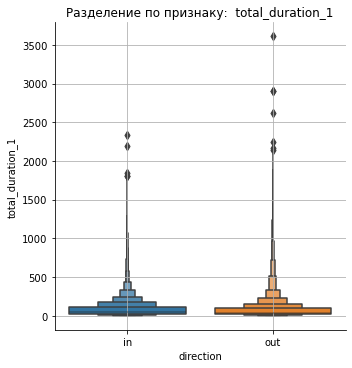

<Figure size 360x360 with 0 Axes>

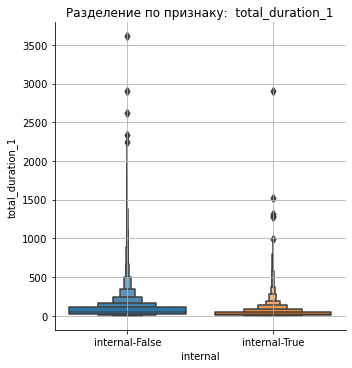

<Figure size 360x360 with 0 Axes>

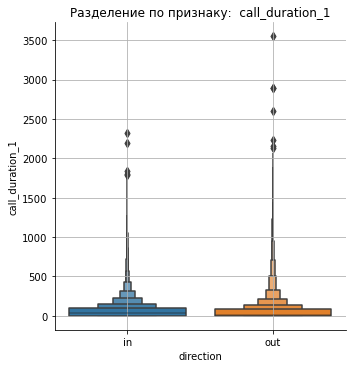

<Figure size 360x360 with 0 Axes>

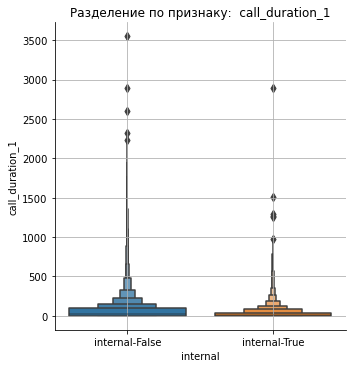

<Figure size 360x360 with 0 Axes>

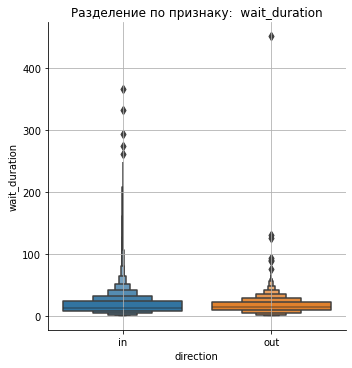

<Figure size 360x360 with 0 Axes>

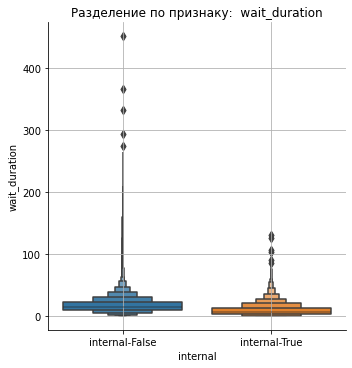

In [47]:
# оценим визуально выбросы по столбцам в зависимости от direction' и 'internal'
for column in ['total_duration_1', 'call_duration_1', 'wait_duration']:
    for d in ['direction', 'internal']:
        plt.figure(figsize=(5, 5))
        sns.catplot(x = d, y = column, kind='boxen', data = df)
        plt.title('Разделение по признаку:  '+ column)
        plt.grid(True)
        plt.show()

***Отфильтруем данные по выбросам***

In [48]:
def min_quant(data, column): #напишем функцию для определения выбросов-min
    min_quant = data[column].quantile(0.25)-1.5*(data[column].quantile(0.75)-data[column].quantile(0.25))
    return min_quant
def max_quant(data, column): #напишем функцию для определения выбросов-max
    max_quant = data[column].quantile(0.75)+1.5*(data[column].quantile(0.75)-data[column].quantile(0.25))
    return max_quant

In [49]:
df_filtered = df.loc[(df['total_duration_1'] >= min_quant(df, 'total_duration_1')) & (df['total_duration_1'] <= max_quant(df, 'total_duration_1'))&
                        (df['call_duration_1'] >= min_quant(df, 'call_duration_1')) & (df['call_duration_1'] <= max_quant(df, 'call_duration_1'))&
                        (df['wait_duration'] >= min_quant(df, 'wait_duration')) & (df['wait_duration'] <= max_quant(df, 'wait_duration'))]

In [50]:
print('Количество строк до фильтрации составляет:', df.shape[0], 
      'Количество строк после фильтрации составляет:', df_filtered.shape[0], 
      'Удалено строк:', df.shape[0]-df_filtered.shape[0], sep='\n')

Количество строк до фильтрации составляет:
43996
Количество строк после фильтрации составляет:
39637
Удалено строк:
4359


## Кластеризация операторов

***Разделим колл-центры в зависимости от направления вызовов 'direction' (out - исходящий вызов, in — входящий вызов).***

In [51]:
# переведем тип данных столбца is_missed_call из логического к численному,
# под условием что если звонок является пропущенным True=1
df_filtered['is_missed_call'] = df_filtered['is_missed_call'].map({True: 1, False: 0})
df_filtered['is_missed_call'].dtypes

dtype('int64')

In [52]:
df_out = df_filtered.query('direction == "out"')
# df_out.head(3)

In [53]:
df_in = df_filtered.query('direction == "in"')
# df_in.head(3)

***Получим медиану по данным таблиц df_out, df_in***

In [54]:
# данные по исходящим вызовам
d_out = df_out[['calls_count', 'call_duration', 'total_call_duration', 'total_duration_1', 'call_duration_1', 'wait_duration']].\
median().reset_index().rename(columns = {'index' : 'column_name', 0 : 'median_out'})

In [55]:
# данные по входящим вызовам
d_in = df_in[['calls_count', 'call_duration', 'total_call_duration', 'total_duration_1', 'call_duration_1', 'wait_duration']].\
median().reset_index().rename(columns = {'index' : 'column_name', 0 : 'median_in'})

In [56]:
out_in_total = d_out.merge(d_in, how = 'inner') # объеденим фреймы
out_in_total

,column_name,median_out,median_in
0,calls_count,6.0,3.0
1,call_duration,8.0,40.0
2,total_call_duration,242.0,116.0
3,total_duration_1,34.0,43.0
4,call_duration_1,6.0,28.0
5,wait_duration,15.0,12.0


***Вывод***  
Операторы, работающие с исходящими вызовами:  
- совершают большее число звонков, в среднем в 2 раза;
- имеют меньшее время разговора (с учетом времени ожидания);
- имеют значительно меньшее время чистого разговора;
- имеют более длительное время ожидания.

***Установим пороги эффективности операторов, ориентируясь на медиану набора данных***  
Входящий вызов:
- количество звонков более 3;
- время ожидания не более 12.

Исходящий  вызов:
- количество звонков более 6;
- продолжительность разговора более 6.

***Для исходящих вызовов основное значение имеет количество звонков, которое совершает оператор и продолжительность разговора, в процессе которого происходит общение с клиентом, прр этом время ожидания не может оказывать существенную роль, так как в большей степени зависит не о оператора, а от клиента.  
Для входящих вызовов основное значение имеет количество пропущенных звонков, которое принимает оператор, и время ожидания, которое играет важную роль при клиентоориентированном подходе, потому что при значительном времени ожидания клиент может перестать пользоваться услугами колл-центра, в то же время продолжительность разговора здесь в большей степени зависит от клиента.***

***Выделим операторов по эффективности на исходящих вызовах***

In [57]:
# напишем функцию для определения эффективности операторов исходящих вызовов
def effect_group_out(row):
    calls_count = row['calls_count']
    call_duration_1 = row['call_duration_1']
    if calls_count >= 6:
        if call_duration_1 >= 6:
            return 'yes'
    return 'no'
df_out['effect'] = df_out.apply(effect_group_out, axis = 1)

In [58]:
df_out.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,data,total_duration_1,call_duration_1,wait_duration,effect
1,166377,2019-08-05 00:00:00+03:00,out,internal-True,880022,1,3,0,5,2019-08-05,2,0,2,no
2,166377,2019-08-05 00:00:00+03:00,out,internal-True,880020,1,1,0,1,2019-08-05,1,0,1,no


In [59]:
# напишем функцию для определения эффективности операторов входящих вызовов
def effect_group_in(row):
    is_missed_call = row['is_missed_call']
    wait_duration = row['wait_duration']
    if is_missed_call == 0:
        if wait_duration <= 12:
            return 'yes'
    return 'no'
df_in['effect'] = df_in.apply(effect_group_in, axis = 1)

In [60]:
df_in.head(2)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,data,total_duration_1,call_duration_1,wait_duration,effect
0,166377,2019-08-04 00:00:00+03:00,in,internal-False,1,1,2,0,4,2019-08-04,2,0,2,no
7,166377,2019-08-05 00:00:00+03:00,in,internal-False,1,1,6,0,35,2019-08-05,6,0,6,no


In [61]:
# объединение фрейма при необходимости
# df1 = anime[0:2]
# df2 = anime[2:4]
# pd.concat([df1, df2], ignore_index=True)
# pd.concat([df_in, df_out], ignore_index=True)

***Определим количество операторов по признаку 'эффективность'***

In [62]:
print('Общее количество операторов на линиях составляет:', df_filtered['operator_id'].nunique(), 'человек.')

Общее количество операторов на линиях составляет: 1064 человек.


In [63]:
print('Общее количество операторов на исходящей линии составляет:', df_out['operator_id'].nunique(), 'человек.')

Общее количество операторов на исходящей линии составляет: 860 человек.


In [64]:
print('Общее количество операторов на входящей линии составляет:', df_in['operator_id'].nunique(), 'человек.')

Общее количество операторов на входящей линии составляет: 714 человек.


***Часть операторов совмещает работу на входящих и исходящих линиях, рассмотим их по отдельности чтоб поеять эффективность на каждом направлении*** 

***На исходящих вызовах (direction - out)***

In [65]:
df_out.groupby('effect').agg({'operator_id': 'unique'})

,operator_id
effect,
no,"[880022, 880020, 881278, 880028, 880026, 1, 88..."
yes,"[880028, 880026, 880022, 882684, 882686, 90251..."


In [66]:
df_out.query('operator_id == 880028').head(3)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,data,total_duration_1,call_duration_1,wait_duration,effect
14,166377,2019-08-07 00:00:00+03:00,out,internal-False,880028,1,1,0,15,2019-08-07,15,0,15,no
21,166377,2019-08-09 00:00:00+03:00,out,internal-False,880028,0,17,1603,1725,2019-08-09,101,94,7,yes
22,166377,2019-08-09 00:00:00+03:00,out,internal-False,880028,1,2,0,2,2019-08-09,1,0,1,no


***Оцениваем, что в разные дни операторы показали разную эффективность, поэтому применим подход средних значений***

In [67]:
df_out.head(1)

,user_id,date,direction,internal,operator_id,is_missed_call,calls_count,call_duration,total_call_duration,data,total_duration_1,call_duration_1,wait_duration,effect
1,166377,2019-08-05 00:00:00+03:00,out,internal-True,880022,1,3,0,5,2019-08-05,2,0,2,no


In [68]:
df_out_group = df_out.groupby('operator_id').agg({'calls_count': 'mean', 
                                                  'total_duration_1': 'mean',  'call_duration_1': 'mean', 
                                                   'wait_duration': 'mean', 'is_missed_call': 'mean'}).round(0)
# df_out_group.head(3)

In [69]:
df_out_group['effect'] = df_out_group.apply(effect_group_out, axis = 1)
df_out_group.head(3)

,calls_count,total_duration_1,call_duration_1,wait_duration,is_missed_call,effect
operator_id,,,,,,
1,1.0,10.0,7.0,3.0,1.0,no
879896,9.0,52.0,38.0,14.0,1.0,yes
879898,43.0,40.0,25.0,15.0,1.0,yes


In [70]:
o_1 = df_out_group['effect'].value_counts().reset_index().\
                                           rename(columns = {'index' : 'effect_out', 'effect': 'count'})
o_2 = df_out_group['effect'].value_counts(normalize=True).reset_index().\
                                         rename(columns = {'index' : 'effect_out', 'effect': '%'}).round(4)

o_2['%'] = o_2['%'] * 100
o_total = o_1.merge(o_2, how = 'inner')
o_total

,effect_out,count,%
0,no,505,58.72
1,yes,355,41.28


***На входящих вызовах (direction - in)***

In [71]:
df_in_group = df_in.groupby('operator_id').agg({'calls_count': 'mean', 
                                                  'total_duration_1': 'mean',  'call_duration_1': 'mean', 
                                                  'wait_duration': 'mean', 'is_missed_call': 'mean'}).round(0)
# df_in_group.head(3)

In [72]:
df_in_group['effect'] = df_in_group.apply(effect_group_in, axis = 1)
df_in_group.head(3)

,calls_count,total_duration_1,call_duration_1,wait_duration,is_missed_call,effect
operator_id,,,,,,
1,15.0,15.0,0.0,15.0,1.0,no
879896,3.0,82.0,73.0,9.0,0.0,yes
879898,2.0,76.0,66.0,11.0,0.0,yes


In [73]:
i_1 = df_in_group['effect'].value_counts().reset_index().\
                                           rename(columns = {'index' : 'effect_in', 'effect': 'count'})
i_2 = df_in_group['effect'].value_counts(normalize=True).reset_index().\
                                         rename(columns = {'index' : 'effect_in', 'effect': '%'}).round(4)

i_2['%'] = i_2['%'] * 100
i_total = i_1.merge(i_2, how = 'inner')
i_total

,effect_in,count,%
0,no,412,57.7
1,yes,302,42.3


***Вывод:***  
- на исходящих линиях количество эффективных операторов меньше, чем на входящих.

## Проверка гипотез

***Проверим предположение о разном количестве операторов в разные дни недели***

In [74]:
# сгруппируем фрейм по дате с учетом направления вызова и посчитаем количество операторов на линии
data_operator = df_filtered.pivot_table(index=['data'], columns = 'direction',  values = 'operator_id', aggfunc = 'nunique').\
                                reset_index()
# data_operator.head(3)

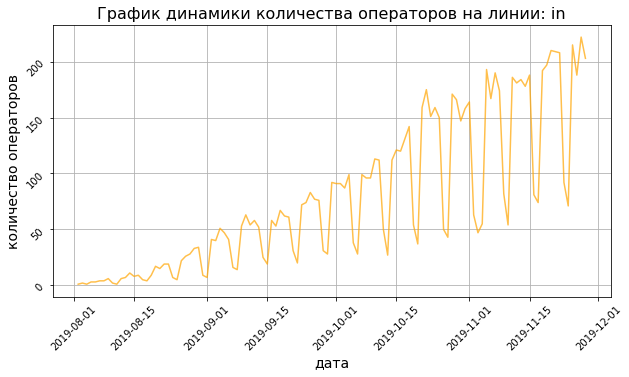

<Figure size 432x288 with 0 Axes>

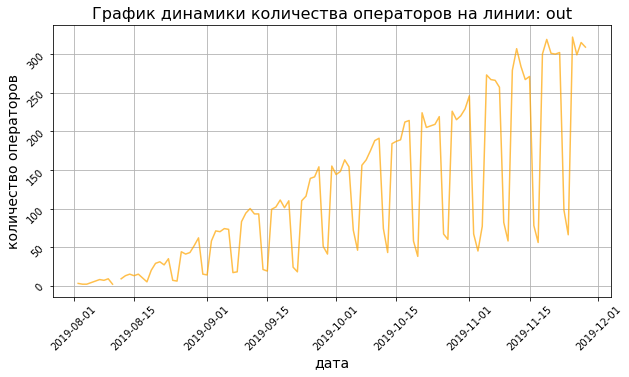

<Figure size 432x288 with 0 Axes>

In [75]:
for column in ['in','out']:
    plt.figure(figsize = (10, 5))
    plt.plot(data_operator['data'].tolist(), data_operator[column].tolist(), 
    alpha = .7, color = 'orange', linestyle = 'solid')
    plt.xlabel('дата', fontsize = 14, color = 'black', fontstyle = 'normal')
    plt.ylabel('количество операторов', fontsize = 14, color = 'black', fontstyle = 'normal')
    # размер, стиль, цвет, толщина шрифта
    plt.title('График динамики количества операторов на линии: '+column, fontsize = 16, color = 'black', loc = 'center')
    # название, размер, цвет, выравнивание заголовка
    plt.xticks(rotation = 45) # развернем значение осей чтоб не было наложения
    plt.yticks(rotation = 45)
    plt.grid(True)
    # линии разметки
    plt.show()
    plt.tight_layout()

***Вывод:***
- количество операторов на линии непостоянно в течении недели, увеличивается от начала даты анализа и по воскресеньям значительно сокращается;
- количество операторов на исходящей линии больше, чем на входящей.

### Гипотеза о равенстве длительности ожидания вызовов

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\textit{Длительность ожидания входящих вызовов эффективных и неэффективных операторов равна}\\
   \\
   H_1 :\textit{Длительность ожидания входящих вызовов эффективных и неэффективных операторов отличается}
 \end{cases}
\end{equation*}$

Уровень значимости: $\alpha = 0.05$

Посчитаем p-value, используя ttest из библиотеки scipy для сравнения средних двух выборок.

Если p-value будет меньше выбранного уровня значимости $\alpha = 0.05$, то нулевую гипотезу о равенстве средних отвергнем. Иначе сделаем вывод, что данные не позволили нам отвергнуть нулевую гипотезу.

***Для операторов на входящих линиях***

In [76]:
# H0: p = p0 (population proportion is equal to hypothesized proportion p0)
# The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:

# H1 (two-tailed): p ≠ p0 (two-tailed population proportion is not equal to some hypothesized value p0)
# H1 (left-tailed): p < p0 (left-tailed population proportion is less than some hypothesized value p0)
# H1 (right-tailed): p > p0 (right-tailed population proportion is greater than some hypothesized value p0)

# ссылка https://www.geeksforgeeks.org/how-to-perform-a-one-proportion-z-test-in-python/

In [77]:
# df_in.query('effect == "no"')['wait_duration']

In [78]:
missed_group = df_in.groupby('effect').agg({'is_missed_call': 'count'}).reset_index().\
                                        rename(columns = {'is_missed_call': 'count'})
missed_group

,effect,count
0,no,11051
1,yes,4721


***Вывод:***  
- количество пропущенных вызовов у эффективных операторов значительно меньше, чем у неэффективных.

***Применим непараметрический тест Манна-Уитни (в том числе для ненормально распределенных выборок)***

In [79]:
alpha = .05 # критический уровень статистической значимости (5%)
# если p-value окажется меньше него - отвергнем гипотезу
results = st.mannwhitneyu(df_in.query('effect == "no"')['wait_duration'],
                       df_in.query('effect == "yes"')['wait_duration'], alternative='two-sided')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить нулевую гипотезу')
else:
    print('Принять нулевую гипотезу')
print(results)

p-значение:  0.0
Отклонить нулевую гипотезу
MannwhitneyuResult(statistic=40915870.5, pvalue=0.0)


***Для операторов на исходящих линиях***

In [80]:
# df_out.query('effect == "no"')['call_duration_1']

<p>Введем основную и альтернативные гипотезы:</p>

$\begin{equation*}
 \begin{cases}
   H_0 :\textit{Длительность вызовов эффективных и неэффективных операторов равна}\\
   \\
   H_1 :\textit{Длительность вызовов эффективных и неэффективных операторов отличается}
 \end{cases}
\end{equation*}$


***alternative{‘two-sided’, ‘less’, ‘greater’}  
ссылка https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html***

In [81]:
results = st.mannwhitneyu(df_out.query('effect == "no"')['call_duration_1'],
                       df_out.query('effect == "yes"')['call_duration_1'], alternative='less')
print('p-значение: ', results.pvalue)

if (results.pvalue < alpha):
    print('Отклонить нулевую гипотезу')
else:
    print('Принять нулевую гипотезу')
print(results)

p-значение:  0.0
Отклонить нулевую гипотезу
MannwhitneyuResult(statistic=13869686.0, pvalue=0.0)



***

***Вывод:***
- в ходе работы проведено разделение операторов по признакам эффективности;
- определены неэффективные операторы;
- проверены гипотезы.
***        